
# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The following analysis has been done based on two data sets: the NICS data set, and the Census data set. The former data set includes the number of security checks that have been done through the National Instant Criminal Background Check System (NICS). The Federal Firearm Licensees (FFLs) or the criminal justice/law enforcement aganecies use this system to request background checks on the prospective gun owners. The number and the reason of requesting the background checks have been recorded in this dataset; on a monthly basis and for each individual state from 1998 to 2017. The transactions have been categorized based on the purpose of the check and also the type of firearm. Below is a detailed discription of these categories:

1) Permit and Permit Recheck: to issue a new permit for carrying a concealed gun or to check for an existing permit \
2) Handgun, Long gun, Other, Multiple: to transfer a hand gun, a long gun, or any other gun that can not be categorized as these two. In case of transfering multiple guns, the check has been counted under the Multiple category.\
3) Admin: Using NICS for other purposes \
4) Pre-Pawn: to pawn a firearm as security for the payment or repayment of money \
5) Redemption: to regain posession after pawning the firearm \
6) Returned: to retunr a firearm to an individual\
7) Rentals: before renting a firearm \
8) Private Sale: before a private party seller who is not an FFL sells a firearm to the prospective transferee \
9) Return to Seller: when a purchsed firearm is returned to the private seller \
** All the 4 to 9 categories above have also been divided into subgroups based on the type of traded firearm (hand gun, long gun, other).

The second data set is a collection of some of the results of the census done in the US between years 2010 and 2016. A series of social, economic, and demographic parameters have been reported for each of the 50 states separately. The data related to each state has been classified under a single column. 

### Questions to explore

Although the NICS data does not report the number of gun sale directly, and there are some gun trades that take place without performing background checks, currently these records are considered as the best estimates of the number of gun sale in the US. This data set alongside the Census have been used to explore the effect of some demographic parameters on the gun sale. Following are the two specific questions that have been explored:\
*- Does the age of the population have any impact ont the number of gun sale?* \
*- Does the gender ratio of a population have any impact on the number of gun sale?* 

### Data Selection

To estimate the number of gun sale from the NICS data set the method previously introduced in the [New York Times 2015 analysis](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html) have been applied. Since the permit issuance or permit checking are not indications of a gun transfer, these types of checks and other irrelevant checks to direct gun sale have been ignored in the current analysis. Only hand gun, long gun, and multiple guns checks  have been included in estimating the total number of gun sales. Each hand gun and long gun have been considered as 1.1 sell and each multiple gun as 2 guns.
From the Census data set, the percentage of female population, percentage of people younger than 18 years old, and older than 65 years old in 2010 and 2016 are helpful in answering our proposed questions. The difference in state gun regulations makes comparing the number of guns sales between states unfair, therefore, a within-state comparison has been pursued. The difference in the above mentioned demographic parameters in 2016 relative to 2010, alongside the change in the number of gun sale within the same time window will be used to examine the existence of any potential correlation between these measures.

In [1]:
# importing packages necessary for analysis
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### The NICS data set

In [2]:
# Loading firearm NICS dataset
gunData = pd.read_excel('gun_data.xlsx')
gunData.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# exploring data types and available information
gunData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

As mentioned in the introduction, the handgun, long gun, and multiple transactions are only helpful in estimating the total number of gun sale. These columns will be selected and others will be left out. 
From the information above it is clear that there are some missing datapoints in these columns that we will address later.

In [4]:
# keeping data related to gun sale (ignoring permits and other types)
temp = gunData.iloc[:,np.r_[0:2,4:6,7]]
gunSaleChecks = temp.copy()
gunSaleChecks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   multiple  12485 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 487.8+ KB


In [5]:
gunSaleChecks.head()

,month,state,handgun,long_gun,multiple
0,2017-09,Alabama,5734.0,6320.0,317
1,2017-09,Alaska,2320.0,2930.0,160
2,2017-09,Arizona,11063.0,7946.0,631
3,2017-09,Arkansas,4347.0,6063.0,366
4,2017-09,California,37165.0,24581.0,0


In [6]:
# droppoing data with missing values for the columns we are going to use
gunSaleChecks.dropna(inplace=True)

In [7]:
gunSaleChecks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12465 non-null  object 
 1   state     12465 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12465 non-null  float64
 4   multiple  12465 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 584.3+ KB


In [8]:
# Are there any dupplicates in the records?
gunSaleChecks.duplicated().sum()

0

The extra parameters have been removed and the data is cleaned, so it is time to estimate the number of gun sales:

In [9]:
gunSaleChecks['total_sale_number'] = 1.1*gunSaleChecks['handgun'] + \
1.1*gunSaleChecks['long_gun'] + \
2*gunSaleChecks['multiple']

In [10]:
gunSaleChecks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              12465 non-null  object 
 1   state              12465 non-null  object 
 2   handgun            12465 non-null  float64
 3   long_gun           12465 non-null  float64
 4   multiple           12465 non-null  int64  
 5   total_sale_number  12465 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 681.7+ KB


Currently, state is a column in the data set, but because we are going to make the comparisons for each state individually, it is better to organize the data based on the sates' names. We will remove the state as a column and add it as the index:

In [11]:
# removing state column
stateNames = gunSaleChecks['state']
gunSaleChecks.drop('state',axis=1,inplace=True)


In [12]:
gunSaleChecks.head()

,month,handgun,long_gun,multiple,total_sale_number
0,2017-09,5734.0,6320.0,317,13893.4
1,2017-09,2320.0,2930.0,160,6095.0
2,2017-09,11063.0,7946.0,631,22171.9
3,2017-09,4347.0,6063.0,366,12183.0
4,2017-09,37165.0,24581.0,0,67920.6


In [13]:
# adding state as index
gunSaleChecks.index = stateNames
gunSaleChecks.head()

,month,handgun,long_gun,multiple,total_sale_number
state,,,,,
Alabama,2017-09,5734.0,6320.0,317,13893.4
Alaska,2017-09,2320.0,2930.0,160,6095.0
Arizona,2017-09,11063.0,7946.0,631,22171.9
Arkansas,2017-09,4347.0,6063.0,366,12183.0
California,2017-09,37165.0,24581.0,0,67920.6


### The Census data set

In [14]:
# Loading census data:
censusData = pd.read_csv('U.S. Census Data.csv')
censusData.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [15]:
# checking the parameters and their types
censusData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

The fact column contains the names of the parameters that are included in the report. We need to know what those parameters are more precisely:

In [16]:
# exact outputs of the census data:
censusData['Fact'].unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

We need the parameters related to gender ratio, and age of the population in 2010 and 2016. From above we are able to locate where these parameters are in the table and select them:

In [17]:
# selecting the relevant data:
temp = censusData.iloc[np.r_[6:12],:]
selectedCensusParams = temp.copy()

In [18]:
selectedCensusParams.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
10,"Female persons, percent, July 1, 2016, (V2016)",NaN,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%


Before proceeding, by checking the Fact note column we will ensure that there is no exception or special point that should be considered:

In [19]:
selectedCensusParams['Fact Note']

6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
Name: Fact Note, dtype: object

There is no note, so we can remove this column entirely:

In [20]:
# removing fact note column
selectedCensusParams.drop('Fact Note',axis=1,inplace=True)

In [21]:
selectedCensusParams.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
10,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%


In [22]:
# checking the names of the rows:
selectedCensusParams['Fact']

6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
Name: Fact, dtype: object

The names are rather long and it is better to use more concise names:

In [23]:
# naming the rows with shorter names:
newIndexNames = ('under18_perc_2016','under18_perc_2010',\
                             'over65_perc_2016','over65_perc_2010',\
                             'female_perc_2016','female_perc_2010')
selectedCensusParams.index = newIndexNames


In [24]:
selectedCensusParams

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
under18_perc_2016,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
under18_perc_2010,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
over65_perc_2016,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
over65_perc_2010,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
female_perc_2016,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
female_perc_2010,"Female persons, percent, April 1, 2010",51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,...,0.5,0.513,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%


In [25]:
# droppiong the long names
selectedCensusParams.drop('Fact',axis=1,inplace=True)

In [26]:
selectedCensusParams

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
under18_perc_2016,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
under18_perc_2010,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,25.70%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
over65_perc_2016,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,13.10%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
over65_perc_2010,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,10.70%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%
female_perc_2016,51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,51.30%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
female_perc_2010,51.50%,48.00%,50.30%,50.90%,50.30%,49.90%,51.30%,51.60%,51.10%,51.20%,...,0.5,0.513,50.40%,49.80%,50.70%,50.90%,50.20%,50.70%,50.40%,49.00%


As discussed before, because we are aiming to compare each state with itself it is better to reorganize the data so that the names of the states are the indepenent variable in the table and the other parameters are the depenedent (i.e. the columns).

In [27]:
# switching rows and columns
censusParamsStateAsRows = selectedCensusParams.transpose()

In [28]:
censusParamsStateAsRows.head()

,under18_perc_2016,under18_perc_2010,over65_perc_2016,over65_perc_2010,female_perc_2016,female_perc_2010
Alabama,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%
Alaska,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%
Arizona,23.50%,25.50%,16.90%,13.80%,50.30%,50.30%
Arkansas,23.60%,24.40%,16.30%,14.40%,50.90%,50.90%
California,23.20%,25.00%,13.60%,11.40%,50.30%,50.30%


In [29]:
# checking the type of parameters:
censusParamsStateAsRows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   under18_perc_2016  50 non-null     object
 1   under18_perc_2010  50 non-null     object
 2   over65_perc_2016   50 non-null     object
 3   over65_perc_2010   50 non-null     object
 4   female_perc_2016   50 non-null     object
 5   female_perc_2010   50 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


The values of the reported parameters are saved as object and for performing more calculations on these numbers their types should be changed:

In [30]:
# dropping the % sign in the values and changing their types to float from object
colNames = censusParamsStateAsRows.columns
cleanedCensusVals = censusParamsStateAsRows

for colName in colNames:
    cleanedCensusVals[colName] = censusParamsStateAsRows[colName].str.strip('%').astype(float)

In [31]:
cleanedCensusVals.head()

,under18_perc_2016,under18_perc_2010,over65_perc_2016,over65_perc_2010,female_perc_2016,female_perc_2010
Alabama,22.6,23.7,16.1,13.8,51.6,51.5
Alaska,25.2,26.4,10.4,7.7,47.7,48.0
Arizona,23.5,25.5,16.9,13.8,50.3,50.3
Arkansas,23.6,24.4,16.3,14.4,50.9,50.9
California,23.2,25.0,13.6,11.4,50.3,50.3


### Combining the two data sets

To combine the two data sets, we need to have all of the parameters organized under each state's name. So, first it is necessary to make sure that the states covered in the two data sets are the same. To do so, we will first check the number of regions included in the reports:

In [32]:
# number of states in the census data set:
censusRegions = cleanedCensusVals.index
len(censusRegions)

50

In [33]:
# number of states in the NICS data set
gunCheckRegions = gunSaleChecks.index.unique()
len(gunCheckRegions)

55

The number of the states are not the same across the two data sets, therefore we need to extract the 5 extra states in the NICS data set and remove the data related to those:

In [34]:
# finding extra regions in the NICS data set
uncommonRegions = []
for region in gunCheckRegions:
    if region not in censusRegions:
        uncommonRegions.append(region)
uncommonRegions

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

In [35]:
#removing data related to the extra regions:
gunSaleChecks.query('index!=["District of Columbia","Guam","Mariana Islands","Puerto Rico","Virgin Islands"]',\
                    inplace=True)

In [36]:
len(gunSaleChecks.index.unique())

50

Now, it is certain that similar states have been covered in both data sets. But this is not enough, to combine the two data sets we need to make sure that the order is the same as well:

In [37]:
# are the indices (the sates' names) similar across the two data sets
gunSaleChecks.index.unique()==cleanedCensusVals.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

From the above information we can conclude that the order is the same and no more change is necessary.

The comparison will be between years 2010 and 2016. Therefore, the records related to these dates will be selected and saved in separate tables:

In [38]:
# saving the information from 2016 in a separate table:
gunSaleCheck16 = gunSaleChecks[gunSaleChecks['month'].str.contains('2016')]
gunSaleCheck16['month'].unique()

array(['2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07',
       '2016-06', '2016-05', '2016-04', '2016-03', '2016-02', '2016-01'],
      dtype=object)

In [39]:
# taking the mean of the prameters for year 2016
gunSaleCheck16Mean = gunSaleCheck16.groupby(level=0).mean()
# checking if the results include all the states
len(gunSaleCheck16Mean)

50

In [40]:
# taking the mean of the prameters for year 1010
gunSaleCheck10 = gunSaleChecks[gunSaleChecks['month'].str.contains('2010')]
gunSaleCheck10['month'].unique()

array(['2010-12', '2010-11', '2010-10', '2010-09', '2010-08', '2010-07',
       '2010-06', '2010-05', '2010-04', '2010-03', '2010-02', '2010-01'],
      dtype=object)

In [41]:
# checking if the results include all the states
gunSaleCheck10Mean = gunSaleCheck10.groupby(level=0).mean()
len(gunSaleCheck10Mean)

50

Similar to the NICS data set, the Census data set will divided into two tables as well. One for 2016 and one for 2010:

In [42]:
# taking the data from 2016
censusParams16 = cleanedCensusVals.iloc[:,np.r_[0,2,4]]
censusParams16.head()

,under18_perc_2016,over65_perc_2016,female_perc_2016
Alabama,22.6,16.1,51.6
Alaska,25.2,10.4,47.7
Arizona,23.5,16.9,50.3
Arkansas,23.6,16.3,50.9
California,23.2,13.6,50.3


Later will will deduct the 2010 parameters from the 2016 parameters, so the columns should have the same names. We will remove the date from the names to reach to that similar name across the two tables:

In [43]:
# removing 2016 from column names:
colNames = censusParams16.columns
newColNames = colNames.str.strip('_2016')
censusParams16.columns = newColNames
censusParams16.head()

,under18_perc,over65_perc,female_perc
Alabama,22.6,16.1,51.6
Alaska,25.2,10.4,47.7
Arizona,23.5,16.9,50.3
Arkansas,23.6,16.3,50.9
California,23.2,13.6,50.3


To have one value as the indicator of the age of population we will compute the percentage of people within the age range of 18-65 and add this information to the table. This number is equal to the number of people not under 18 and not over 65: 

In [44]:
# finding percentage of people 18-65
temp = 100 -  censusParams16.iloc[:,0] - censusParams16.iloc[:,1]
censusParams16.insert(2,'bw18And65_perc',temp)
censusParams16.head()

,under18_perc,over65_perc,bw18And65_perc,female_perc
Alabama,22.6,16.1,61.3,51.6
Alaska,25.2,10.4,64.4,47.7
Arizona,23.5,16.9,59.6,50.3
Arkansas,23.6,16.3,60.1,50.9
California,23.2,13.6,63.2,50.3


In [45]:
# taking the data from 2010
censusParams10 = cleanedCensusVals.iloc[:,np.r_[1,3,5]]
censusParams10.head()

,under18_perc_2010,over65_perc_2010,female_perc_2010
Alabama,23.7,13.8,51.5
Alaska,26.4,7.7,48.0
Arizona,25.5,13.8,50.3
Arkansas,24.4,14.4,50.9
California,25.0,11.4,50.3


In [46]:
# removing 2010 from column names:
colNames = censusParams10.columns
newColNames = colNames.str.strip('_2010')
censusParams10.columns = newColNames
censusParams10.head()

,under18_perc,over65_perc,female_perc
Alabama,23.7,13.8,51.5
Alaska,26.4,7.7,48.0
Arizona,25.5,13.8,50.3
Arkansas,24.4,14.4,50.9
California,25.0,11.4,50.3


In [47]:
# finding percentage of people 18-65
temp = 100 - censusParams10.iloc[:,0] - censusParams10.iloc[:,1]
censusParams10.insert(2,'bw18And65_perc',temp)
censusParams10.head()

,under18_perc,over65_perc,bw18And65_perc,female_perc
Alabama,23.7,13.8,62.5,51.5
Alaska,26.4,7.7,65.9,48.0
Arizona,25.5,13.8,60.7,50.3
Arkansas,24.4,14.4,61.2,50.9
California,25.0,11.4,63.6,50.3


The NICS data set and the Census data set are cetagorized with states names and are ordered in the same order. Now, we can combine the two tables for each of the two years of 2016 and 2010:

In [48]:
# combing nics and census data sets for 2016
cmbndGunCensus16 = pd.concat([gunSaleCheck16Mean,censusParams16],axis=1)
cmbndGunCensus16.head()


,handgun,long_gun,multiple,total_sale_number,under18_perc,over65_perc,bw18And65_perc,female_perc
Alabama,12760.250000,10163.583333,545.416667,26307.050000,22.6,16.1,61.3,51.6
Alaska,3124.250000,3073.916667,193.000000,7203.983333,25.2,10.4,64.4,47.7
Arizona,13898.666667,9082.333333,659.000000,26597.100000,23.5,16.9,59.6,50.3
Arkansas,6687.000000,6843.333333,366.666667,15616.700000,23.6,16.3,60.1,50.9
California,46696.250000,46212.500000,0.000000,102199.625000,23.2,13.6,63.2,50.3


In [49]:
# combing nics and census data sets for 2010
cmbndGunCensus10 = pd.concat([gunSaleCheck10Mean,censusParams10],axis=1)
cmbndGunCensus10.head()


,handgun,long_gun,multiple,total_sale_number,under18_perc,over65_perc,bw18And65_perc,female_perc
Alabama,9746.916667,11376.583333,455.416667,24146.683333,23.7,13.8,62.5,51.5
Alaska,2143.333333,2764.750000,126.583333,5652.058333,26.4,7.7,65.9,48.0
Arizona,7430.166667,5755.583333,314.000000,15132.325000,25.5,13.8,60.7,50.3
Arkansas,4166.000000,6017.166667,262.083333,11725.650000,24.4,14.4,61.2,50.9
California,20429.916667,22954.833333,0.000000,47723.225000,25.0,11.4,63.6,50.3


We are interested in the changes that have happened from 2010 to 2016, so following we will find these differences by deducing the 2010 parameters from the 2016 ones:

In [50]:
# deducing 2010 data from 2016 data
diff16And10 = cmbndGunCensus16 - cmbndGunCensus10
diff16And10.head()

,handgun,long_gun,multiple,total_sale_number,under18_perc,over65_perc,bw18And65_perc,female_perc
Alabama,3013.333333,-1213.000000,90.000000,2160.366667,-1.1,2.3,-1.2,0.1
Alaska,980.916667,309.166667,66.416667,1551.925000,-1.2,2.7,-1.5,-0.3
Arizona,6468.500000,3326.750000,345.000000,11464.775000,-2.0,3.1,-1.1,0.0
Arkansas,2521.000000,826.166667,104.583333,3891.050000,-0.8,1.9,-1.1,0.0
California,26266.333333,23257.666667,0.000000,54476.400000,-1.8,2.2,-0.4,0.0


<a id='eda'></a>
## Exploratory Data Analysis


### Does the age of the population have any impact on the number of gun sale?

Checking the values and range of changes in the age of population from 2010 to 2016 as the first step, will be helpful in deciding how to examine its relationship with the change in gun sale in the next step:

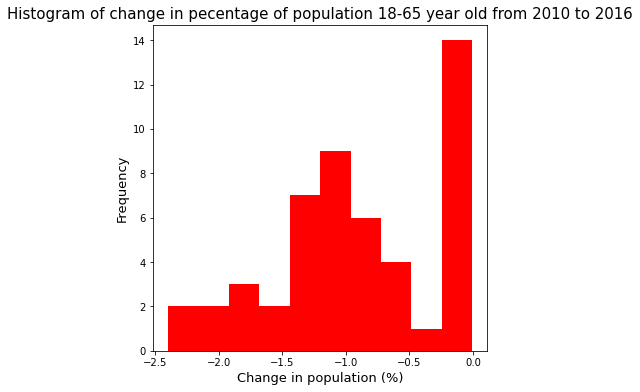

In [51]:
# plotting histogram of change in age:
plt.figure(figsize=(6,6))
plt.hist(diff16And10['bw18And65_perc'],color='r');
plt.xlabel('Change in population (%)',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.title('Histogram of change in pecentage of population 18-65 year old from 2010 to 2016',fontsize=15);

The histogram shows that the percetange change values are varied and it can be considered as a continuous parameter. Therefore, testing its relationship with change in gun sale in a scatter plot and finding the correlation coefficient can be helpful. 
To determine if the relationship depends on the gun type, the anaylsis has been performed once for all the gun sales and again for separate gun types of hand gun and long gun. In the long gun condition, there was one point with a very significant negative value, that was considered as an outlier. Although it did not affect the sign of the estimated correlation coefficient, to improve the precision of the estimation it was excluded from the estimation.

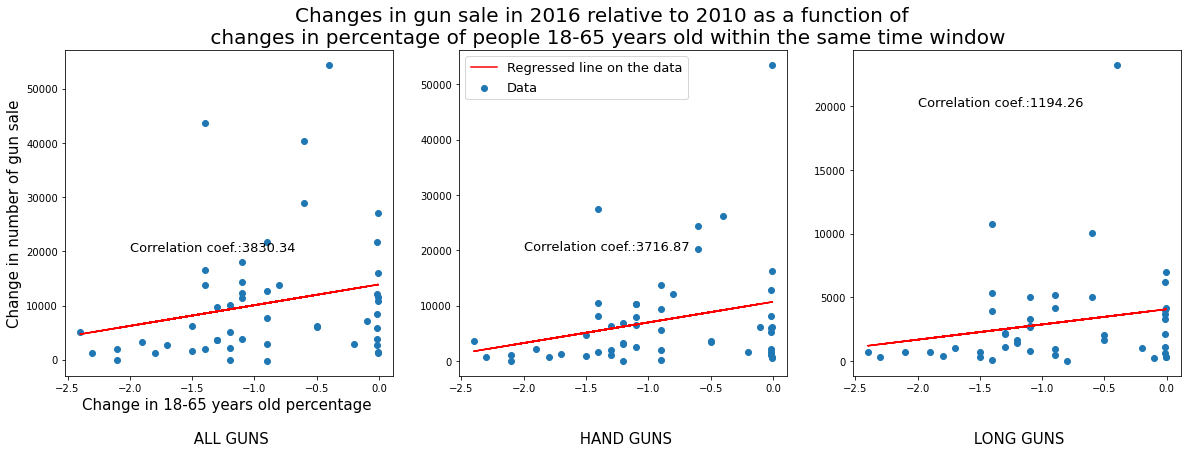

In [52]:
# the function estimates the best linear function for the data
# and plots the estimated function and the data 
def LinearRegrsAndPlot(x,y):
    regrsModl = LinearRegression().fit(x,y)
    yPredctd  = regrsModl.predict(x)
    
    crCf = np.squeeze(regrsModl.coef_[0])
    intcp = np.squeeze(regrsModl.intercept_[0])
    
    plt.scatter(x,y)
    plt.plot(x,yPredctd,color='r')
    plt.text(-2,20000,'Correlation coef.:{:.2f}'.format(crCf),fontsize=13)
    return [intcp,crCf]
    
fig = plt.figure(figsize=(20,6))

# total number of gun sales:
a = plt.subplot(131)
estmdCoefs = LinearRegrsAndPlot(diff16And10['bw18And65_perc'].values.reshape(-1,1),\
                                diff16And10['total_sale_number'].values.reshape(-1,1))
plt.xlabel('Change in 18-65 years old percentage \n \n ALL GUNS',fontsize=15)
plt.ylabel('Change in number of gun sale',fontsize=15)

# hand gun:
plt.subplot(132)
estmdCoefs = LinearRegrsAndPlot(diff16And10['bw18And65_perc'].values.reshape(-1,1),\
                                y=diff16And10['handgun'].values.reshape(-1,1))
plt.xlabel('\n \n HAND GUNS',fontsize=15)
plt.legend(['Regressed line on the data','Data'],fontsize=13)

# long gun:
# the negative outlier will be excluded:
plt.subplot(133)
estmdCoefs = LinearRegrsAndPlot(diff16And10[diff16And10['long_gun']>0]['bw18And65_perc'].values.reshape(-1,1),\
                                y=diff16And10[diff16And10['long_gun']>0].long_gun.values.reshape(-1,1))
plt.xlabel(' \n \n LONG GUNS',fontsize=15)

fig.suptitle('Changes in gun sale in 2016 relative to 2010 as a function of \n changes in percentage of people 18-65 years old within the same time window',\
             fontsize=20);



### Does the gender ratio of a population have any impact on the number of gun sale?

To gain insight into the range and values of the change in percentage of female population, looking at its histogram can be helpful:

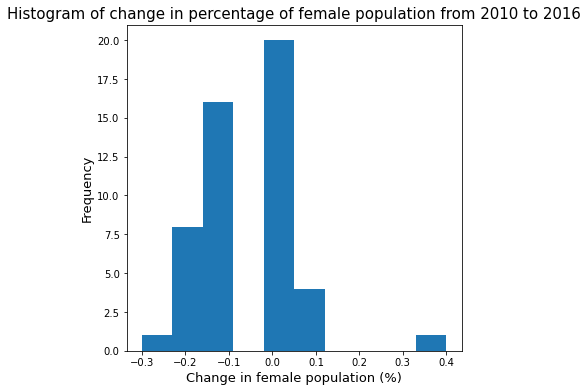

In [53]:
plt.figure(figsize=(6,6))
plt.hist(diff16And10['female_perc']);
plt.xlabel('Change in female population (%)',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.title('Histogram of change in percentage of female population from 2010 to 2016',fontsize=15);

The values seem rather disperse and discrete. Therefore, the values will be divided into different groups and the basis of the analysis wil be a comparison between the mean values of these groups. Based on the histogram, the change in female population can be eigher positive, negative or zero. We will investigate how the change in gun sale for these three groups are in comparison with each other and this will show if the gender ratio has any impact on the gun sale.

number of data points in female_perc<0: 33
number of data points in female_perc==0: 10
number of data points in female_perc>0: 7


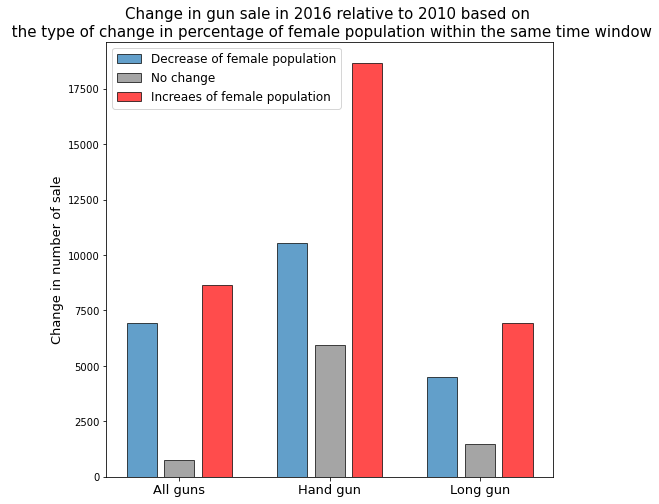

In [54]:
# three conditions
femalePrcChangs = ('female_perc<0','female_perc==0','female_perc>0')

fig = plt.figure(figsize=(8,8))
plt.title('Change in gun sale in 2016 relative to 2010 based on \n the type of change in percentage of female population within the same time window',\
         fontsize=15)
iw = 1;
for changeCnd in femalePrcChangs:
    # how many data points are included in each group?
    print('number of data points in {}:'.format(changeCnd),diff16And10.query(changeCnd).shape[0])
    # finding the mean of the gun sales for each group:
    meanSales = diff16And10.query(changeCnd).mean()
    # plotting the resuls
    figHndl = plt.bar([1+(iw-1)*4,2+(iw-1)*4,3+(iw-1)*4],[meanSales.handgun,meanSales.long_gun,meanSales.total_sale_number],\
            color=['tab:blue','tab:grey','r'],edgecolor='k',alpha=.7)
    iw+=1
    
    
plt.ylabel('Change in number of sale',fontsize=13);
plt.xticks([2,6,10],['All guns','Hand gun','Long gun'],fontsize=13);
plt.legend(figHndl,['Decrease of female population','No change','Increaes of female population'],fontsize=12);

<a id='conclusions'></a>
## Conclusions

*Does the age of the population have any impact on the number of gun sale?*\

The results clearly show a positve correlation between the change in gun sale and the change in the age of the population regardless of the gun type. The decrease in the young population (here defined as people between 18 and 65 years old) have resulted in the decrease of the gun sale. However, to confirm the statistical significance of this correlation further statistical tests are needed. Does this mean that the younger people are buying the guns? The answer to this question is not in the scope of this analysis. There are other paramters that can affect the gun sale and to ensure that the age group is the parameter that is causing the change in gun sale other tests should be performed. 

*Does the gender ratio of the population have any impact on the number of gun sale?* \
In the final figure, comparison of the change in gun sale across the three conditions show a similar pattern for all gun types: the mere change in gender ratio of the population, regardless of the direction of this change, has increased the number of gun sales. In other words,the increase in the number of gun sale is more when the female population has increased or decreased relative to when there has been no change in the female population. The increase in gun sale is also more when the female population has grown relative to when this population has shrank. This difference is smaller in All guns and long gun types, but it is more noticable in hand gun type. This is critical to remember that without proper statitical tests the significant of these difference cannot be confirmed and further tests are required. The other point is that the number of points included in the analysis are different among these three groups. Most of the states have shown a decrease in femaple population (33 out of 50) and this may have introduced some biases into our estimations of the means.


In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1